In [95]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [96]:
import pandas as pd

In [97]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)


In [98]:
per_clf = Perceptron()

In [99]:
per_clf.fit(X, y)

Perceptron()

In [100]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

# TensorFlow

In [101]:
import tensorflow as tf
from tensorflow import keras

## Fashion MNIST

### Load the data

In [102]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [103]:
X_train_full.shape

(60000, 28, 28)

In [104]:
X_train_full.dtype

dtype('uint8')

In [105]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [106]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankel boot'
]

In [107]:
class_names[y_train[0]]

'Coat'

### Building a Classification MLP Using the Sequential API

Here is a classification MLP with two hidden layers

In [108]:
model = keras.models.Sequential()

In [109]:
model.add(keras.layers.Flatten(input_shape = [28, 28])) #Reshape input
model.add(keras.layers.Dense(300, activation = 'relu')) #First hidden layer, use 300 neurons
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) #Ten classes so we use 10 neurons

In [110]:
# 或者你也可以在创建的时候就加上
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [111]:
# Get the info of this ANN
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_23 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [112]:
# you can get the layer by calling its name
# hidden1 = model.get_layer('de')
# hidden1

ValueError: No such layer: dense_3.

In [113]:
# weights, biases = hidden1.get_weights()

AttributeError: 'Tensor' object has no attribute 'get_weights'

In [30]:
# weights

array([[-0.0604257 , -0.03786273, -0.05878977, ..., -0.01505605,
        -0.01790915,  0.02219024],
       [ 0.03438316, -0.00327522,  0.05497454, ..., -0.04825617,
        -0.05132599,  0.05818649],
       [-0.06383337, -0.01677889,  0.02641886, ..., -0.00856581,
        -0.05407681,  0.06933144],
       ...,
       [-0.03924997,  0.0427215 ,  0.01446183, ...,  0.04469052,
         0.03279667,  0.00897732],
       [-0.02633975, -0.06674717, -0.06679764, ..., -0.01677327,
        -0.03378034,  0.05603741],
       [ 0.03557319, -0.06827693, -0.00382169, ..., -0.01169978,
        -0.06254911, -0.00526433]], dtype=float32)

In [31]:
# weights.shape
# 300 neurons, each one 你 initialize 一个系数

(784, 300)

In [32]:
# biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
# biases.shape
# 300 neurons, each one 你 initialize 一个系数

(300,)

In [34]:
# Compiling the model
# After a model is created, you must call its compile() method to specify the loss function and the optimizer to use

In [114]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='sgd', 
              metrics = ['accuracy'])
# Use sparse_categorical_crossentropy here becuase we are during multiclass classifier
# If you are doing multilabel classifier, you should use 'binary_crossentropy', and sigmoid as activation function

### Training and evaluating the model

In [115]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
# You can see that loss is decreasing, accuracy is increasing
# Check the gap between train score and valid score to see if there is overfitting

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7208 - accuracy: 0.7614 - val_loss: 0.5126 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4869 - accuracy: 0.8300 - val_loss: 0.4414 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4433 - accuracy: 0.8448 - val_loss: 0.4232 - val_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4160 - accuracy: 0.8555 - val_loss: 0.4117 - val_accuracy: 0.8540
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3953 - accuracy: 0.8616 - val_loss: 0.3981 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3801 - accuracy: 0.8663 - val_loss: 0.3846 - val_accuracy: 0.8664
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3668 - accuracy: 0.8700 - val_loss: 0.3718 - val_accuracy:

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

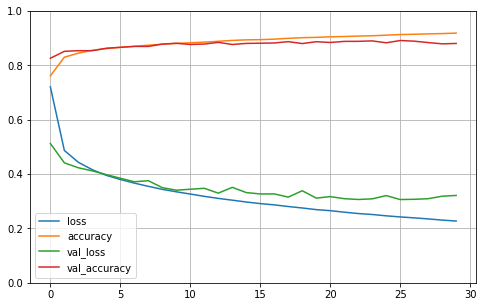

In [117]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
# Draw the learning curve, without defining extra function!

In [118]:
# Evaluate our model on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 73.4542 - accuracy: 0.8269


[73.45423126220703, 0.8269000053405762]

### Make predictions

In [119]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
# Get the predicted probability

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [120]:
y_pred = model.predict_classes(X_new)

In [121]:
y_pred 

array([9, 2, 1])

In [122]:
y_test[:3] # Our predictions is correct!

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API

In [146]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [167]:
housing = fetch_california_housing()

In [168]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target,)

In [169]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [170]:
scaler = StandardScaler()

In [171]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [172]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [173]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd')
# history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

In [131]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 437us/step - loss: 0.3927


In [132]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[1.9000455]
 [1.5836768]
 [1.6279299]]
[1.666 1.956 1.902]


## Building Complex Modesl Using the Functional API

In [133]:
input_ = keras.layers.Input(shape = X_train.shape[1:])

In [134]:
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)

In [135]:
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)

In [136]:
concat = keras.layers.Concatenate()([input_, hidden2])

In [137]:
output = keras.layers.Dense(1)(concat)

In [138]:
model = keras.Model(inputs=[input_], outputs=[output])

In [71]:
# Once you have the model, the following steps are the same
# Compile, Train, Evaluate, Make predictions

## Using the Subclassing API to Build Dynamic Models

In [76]:
class WildeAndDeepModel(keras.Model):
    def __int__(self, units = 30, activation = 'relu', **kwargs):
        super().__int__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
#相当于你自己做了一个model，而且可以随心所欲的加想要的过程
#但如果你只是call keras里的东西，你不能用for loop什么的 

In [77]:
model1 = WildeAndDeepModel()
# 之后的流程和正常的model是一样的

## Saving and Restoring a Model

In [85]:
model.save('my_first_keras_model.h5')

In [88]:
load_model = keras.models.load_model("my_first_keras_model.h5")

### Using callbacks to save your model while training at certain checkpoints

In [89]:
# By default, your model will be saved at the end of each spoch("checkpoint")

## Using TensorBoard for Visualization

In [174]:
import os

In [175]:
root_logdir = os.path.join(os.curdir, 'my_logs')

In [176]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [177]:
run_logdir = get_run_logdir()

In [178]:
run_logdir


'./my_logs/run_2020_08_15-17_16_43'

In [179]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 0s 832us/step - loss: 0.8626 - val_loss: 0.5435
Epoch 2/20
363/363 [==============================] - 0s 580us/step - loss: 1.0675 - val_loss: 4.2104
Epoch 3/20
363/363 [==============================] - 0s 661us/step - loss: 0.5525 - val_loss: 0.4436
Epoch 4/20
363/363 [==============================] - 0s 590us/step - loss: 0.4558 - val_loss: 0.4224
Epoch 5/20
363/363 [==============================] - 0s 634us/step - loss: 0.4423 - val_loss: 0.5096
Epoch 6/20
363/363 [==============================] - 0s 698us/step - loss: 0.4491 - val_loss: 0.4121
Epoch 7/20
363/363 [==============================] - 0s 571us/step - loss: 0.4270 - val_loss: 0.4014
Epoch 8/20
363/363 [==============================] - 0s 605us/step - loss: 0.4162 - val_loss: 0.3942
Epoch 9/20
363/363 [==============================] - 0s 579us/step - loss: 0.4111 - val_loss: 0.3948
Epoch 10/20
363/363 [==============================] - 0s 561us/step - loss: 0.404

In [164]:
%reload_ext tensorboard

In [166]:
%tensorboard --run_logdir --port=6006

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

# Fine-Tuning Neural Network Hyperparameters

In [181]:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = 'relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = 'mse', optimizer=optimizer)
    return model

In [182]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
# 这步的目的是use this model like a regular sklearn regression model?

In [183]:
keras_reg.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid))

Epoch 1/100
363/363 [==============================] - 0s 815us/step - loss: 1.7817 - val_loss: 0.6886
Epoch 2/100
363/363 [==============================] - 0s 585us/step - loss: 0.7468 - val_loss: 0.6027
Epoch 3/100
363/363 [==============================] - 0s 558us/step - loss: 0.6048 - val_loss: 0.5479
Epoch 4/100
363/363 [==============================] - 0s 582us/step - loss: 0.5605 - val_loss: 0.5138
Epoch 5/100
363/363 [==============================] - 0s 595us/step - loss: 0.5317 - val_loss: 0.4924
Epoch 6/100
363/363 [==============================] - 0s 635us/step - loss: 0.5125 - val_loss: 0.4742
Epoch 7/100
363/363 [==============================] - 0s 615us/step - loss: 0.4985 - val_loss: 0.4659
Epoch 8/100
363/363 [==============================] - 0s 566us/step - loss: 0.4862 - val_loss: 0.4536
Epoch 9/100
363/363 [==============================] - 0s 554us/step - loss: 0.4774 - val_loss: 0.4465
Epoch 10/100
363/363 [==============================] - 0s 573us/step - l

Epoch 80/100
363/363 [==============================] - 0s 570us/step - loss: 0.3666 - val_loss: 0.3550
Epoch 81/100
363/363 [==============================] - 0s 598us/step - loss: 0.3671 - val_loss: 0.3537
Epoch 82/100
363/363 [==============================] - 0s 544us/step - loss: 0.3655 - val_loss: 0.3522
Epoch 83/100
363/363 [==============================] - 0s 589us/step - loss: 0.3648 - val_loss: 0.3521
Epoch 84/100
363/363 [==============================] - 0s 601us/step - loss: 0.3646 - val_loss: 0.3530
Epoch 85/100
363/363 [==============================] - 0s 605us/step - loss: 0.3638 - val_loss: 0.3562
Epoch 86/100
363/363 [==============================] - 0s 591us/step - loss: 0.3633 - val_loss: 0.3519
Epoch 87/100
363/363 [==============================] - 0s 604us/step - loss: 0.3622 - val_loss: 0.3692
Epoch 88/100
363/363 [==============================] - 0s 606us/step - loss: 0.3617 - val_loss: 0.3522
Epoch 89/100
363/363 [==============================] - 0s 606us

In [185]:
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

162/162 [==============================] - 0s 516us/step - loss: 0.3806


In [186]:
y_pred

array([1.8813944, 1.5141732, 1.6332026], dtype=float32)

In [187]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# param_ = {
#     'n_hiddens':[0,1,2,3],
#     'n_neurons':np.arange(1, 100).
#     'learning_rate':reciprocal(3e-4, 3e-2)
# }